<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/CRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'CRM'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,102.879997,104.699997,102.269997,104.410004,104.410004,4669200
1,2018-01-03,104.900002,106.139999,104.620003,105.290001,105.290001,3888700
2,2018-01-04,106.000000,107.660004,105.769997,106.680000,106.680000,4540200
3,2018-01-05,107.760002,108.300003,107.199997,108.099998,108.099998,3368400
4,2018-01-08,108.000000,109.139999,107.570000,108.860001,108.860001,2933600


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,183.941589,186.115253,181.459821,183.884687,183.884687,6.294127e+06
std,50.570486,51.020730,49.994381,50.458776,50.458776,4.198675e+06
min,102.879997,104.699997,102.269997,104.029999,104.029999,1.238000e+06
25%,146.879997,148.339996,145.134995,146.965004,146.965004,4.165100e+06
50%,161.800003,163.259995,160.250000,161.949997,161.949997,5.258200e+06
75%,229.455002,231.049995,226.635002,228.240005,228.240005,6.960300e+06
max,310.000000,311.750000,307.250000,309.959991,309.959991,6.325340e+07


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

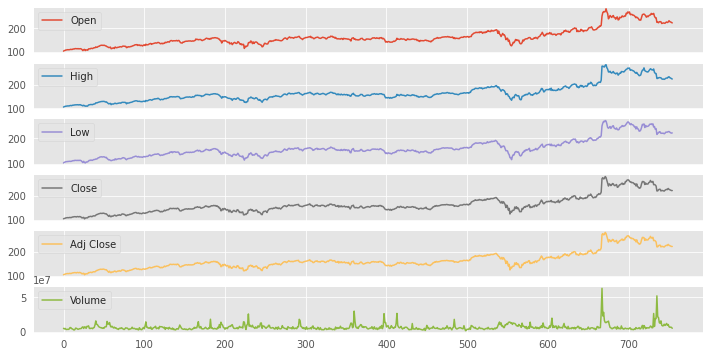

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


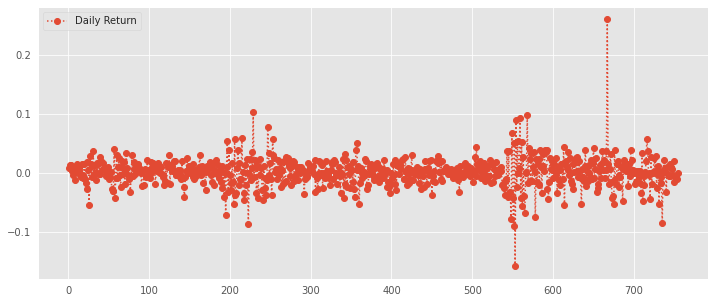

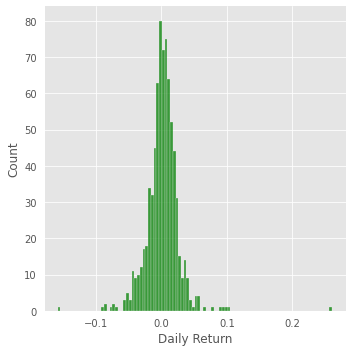

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02  102.879997  104.699997  102.269997  104.410004  104.410004   
1    2018-01-03  104.900002  106.139999  104.620003  105.290001  105.290001   
2    2018-01-04  106.000000  107.660004  105.769997  106.680000  106.680000   
3    2018-01-05  107.760002  108.300003  107.199997  108.099998  108.099998   
4    2018-01-08  108.000000  109.139999  107.570000  108.860001  108.860001   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  232.500000  233.179993  227.110001  227.429993  227.429993   
751  2020-12-24  228.300003  229.190002  224.830002  225.779999  225.779999   
752  2020-12-28  227.220001  227.839996  222.050003  224.639999  224.639999   
753  2020-12-29  224.970001  225.300003  220.860001  222.460007  222.460007   
754  2020-12-30  223.130005  223.639999  221.580002  222.399994  222.399994   

      Volume  MA for 10 days  MA for 50 days  MA fo

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

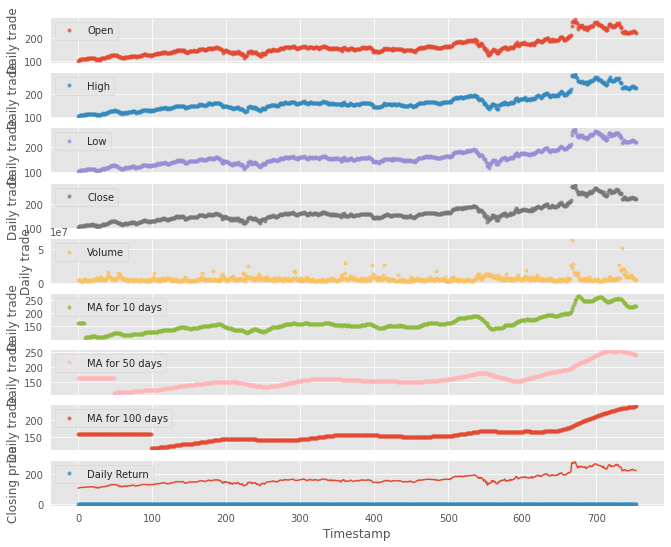

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

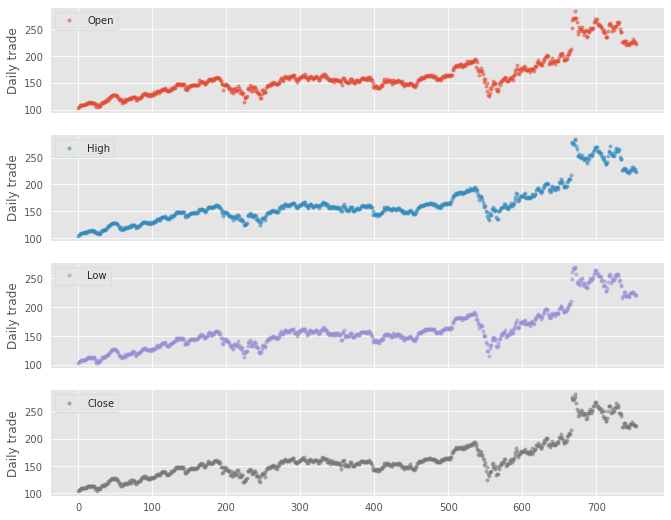

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02  102.879997  104.699997  102.269997  104.410004  104.410004   
1    2018-01-03  104.900002  106.139999  104.620003  105.290001  105.290001   
2    2018-01-04  106.000000  107.660004  105.769997  106.680000  106.680000   
3    2018-01-05  107.760002  108.300003  107.199997  108.099998  108.099998   
4    2018-01-08  108.000000  109.139999  107.570000  108.860001  108.860001   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  232.500000  233.179993  227.110001  227.429993  227.429993   
751  2020-12-24  228.300003  229.190002  224.830002  225.779999  225.779999   
752  2020-12-28  227.220001  227.839996  222.050003  224.639999  224.639999   
753  2020-12-29  224.970001  225.300003  220.860001  222.460007  222.460007   
754  2020-12-30  223.130005  223.639999  221.580002  222.399994  222.399994   

      Volume  MA for 10 days  MA for 50 days  MA fo

,count,mean,std,min,25%,50%,75%,max
Open,755.0,1.627667e+02,3.718828e+01,1.028800e+02,1.410400e+02,1.550500e+02,1.745650e+02,2.834700e+02
High,755.0,1.648296e+02,3.768246e+01,1.047000e+02,1.431600e+02,1.571600e+02,1.768300e+02,2.845000e+02
Low,755.0,1.603789e+02,3.639012e+01,1.022700e+02,1.383600e+02,1.529600e+02,1.716150e+02,2.705800e+02
Close,755.0,1.627383e+02,3.701546e+01,1.040300e+02,1.407600e+02,1.551400e+02,1.751850e+02,2.812500e+02
Adj Close,755.0,1.627383e+02,3.701546e+01,1.040300e+02,1.407600e+02,1.551400e+02,1.751850e+02,2.812500e+02
Volume,755.0,6.334336e+06,4.479330e+06,1.238000e+06,4.135300e+06,5.229500e+06,6.943700e+06,6.325340e+07
MA for 10 days,755.0,1.626985e+02,3.603690e+01,1.079520e+02,1.424120e+02,1.550040e+02,1.744470e+02,2.661740e+02
MA for 50 days,755.0,1.620723e+02,3.164636e+01,1.137094e+02,1.459810e+02,1.552400e+02,1.666151e+02,2.526082e+02
MA for 100 days,755.0,1.604377e+02,2.454223e+01,1.180918e+02,1.456435e+02,1.572853e+02,1.666188e+02,2.410242e+02
Daily Return,755.0,1.304568e-03,2.471100e-02,-1.588848e-01,-9.447277e-03,1.939503e-03,1.320190e-02,2.604490e-01


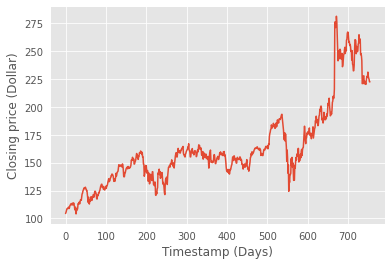

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 12s 183ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.1200 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1040
Epoch 2/40
14/14 [==============================] - 1s 38ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0864 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0823
Epoch 3/40
14/14 [==============================] - 1s 38ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0748 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0675
Epoch 4/40
14/14 [==============================] - 1s 38ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0656 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0636
Epoch 5/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0658 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0676
Epoch 6/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0594 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0621
Epoch 7/40
14/14 [==

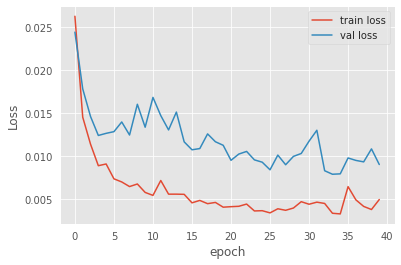

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

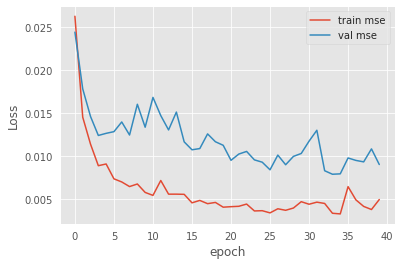

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

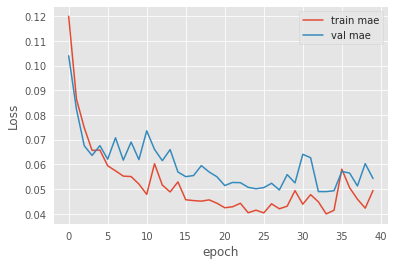

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 9ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0543


[0.009057862684130669, 0.009057862684130669, 0.05427176132798195]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.806287
R2 Score: 0.806287
Max Error: 0.518218


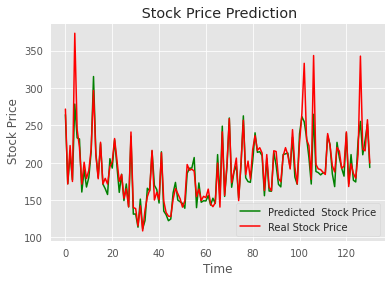

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 11ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0558


[0.005152168683707714, 0.005152168683707714, 0.055816784501075745]

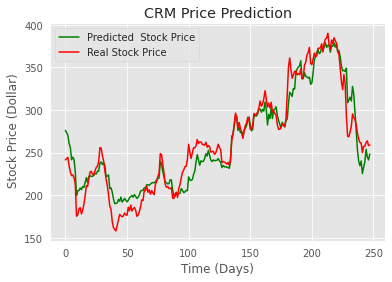

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()